# **Imports**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data_path = '../data/' #if os.path.exists('../data/') #else 'https://raw.githubusercontent.com/TheAwesomeGe/DECD/main/data/'

cvd_df = pd.read_csv(data_path + 'CVD_cleaned.csv')

# 1. **Data Understanding**

**Uma primeira visualização e análise dos dados**

In [3]:
cvd_df.head(10)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163.0,72.57,27.46,Yes,0.0,12.0,12.0,4.0
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163.0,91.63,34.67,No,0.0,12.0,12.0,1.0


In [4]:
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

Verificamos que não existem valores em falta

In [5]:
cvd_df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


Numa primeira analise identificamos alguns valores estranhos como o valor minimo da coluna do peso ser menor que 40kg, BMI com valor maximo de 99.

In [6]:
cvd_df[(cvd_df['Weight_(kg)'] < 30)]


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
21368,Fair,Within the past 5 years,Yes,No,No,No,No,No,No,Female,35-39,122.0,25.40,17.09,No,2.0,24.0,0.0,3.0
35950,Very Good,Within the past 5 years,Yes,No,No,No,No,No,No,Female,40-44,122.0,26.76,18.00,No,0.0,30.0,8.0,4.0
131533,Poor,Within the past year,No,No,No,No,No,No,Yes,Female,80+,152.0,29.94,12.89,Yes,0.0,16.0,20.0,0.0
148350,Poor,Never,Yes,No,No,Yes,No,No,No,Male,60-64,137.0,24.95,13.26,No,0.0,8.0,0.0,0.0
184824,Good,Within the past year,Yes,No,No,Yes,No,No,No,Female,70-74,150.0,27.22,12.12,Yes,0.0,30.0,8.0,0.0
216242,Fair,Within the past year,No,No,No,No,Yes,No,Yes,Female,45-49,140.0,26.31,13.48,No,0.0,3.0,0.0,0.0


In [7]:
cvd_df[(cvd_df['Weight_(kg)'] >= 30) & (cvd_df['Weight_(kg)'] <= 40)]

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
55,Fair,Within the past 2 years,No,No,No,Yes,No,No,No,Female,80+,152.0,32.66,14.06,Yes,0.0,1.0,0.0,0.0
576,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,75-79,135.0,33.11,18.27,Yes,0.0,30.0,8.0,8.0
622,Very Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,80+,145.0,34.02,16.23,No,20.0,60.0,12.0,0.0
3825,Fair,Within the past year,Yes,No,No,No,No,No,Yes,Female,75-79,150.0,36.29,16.16,Yes,0.0,30.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306877,Fair,Within the past year,No,No,No,No,No,No,No,Female,65-69,152.0,36.29,15.62,No,0.0,4.0,8.0,4.0
307100,Good,Within the past year,No,No,No,Yes,No,Yes,No,Female,60-64,150.0,36.74,16.36,No,0.0,30.0,16.0,0.0
307662,Good,Within the past year,No,No,No,No,No,No,No,Female,18-24,142.0,36.29,17.94,No,0.0,12.0,0.0,2.0
307677,Excellent,Within the past year,No,No,No,No,No,No,No,Female,45-49,157.0,34.02,13.72,No,1.0,0.0,2.0,0.0


Depois de uma breve analise, chegamos a conclusao que estes dados nao sao outliers. Podemos ver que maior parte das pessoas que apresenta este valores baixos de peso, sao de baixa estatura, idosas, ou teem/tiveram problemas de saude o que acaba por justificar estes valores.

In [8]:
cvd_df[cvd_df['BMI'] > 45]

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0
29,Fair,Within the past year,No,No,No,No,Yes,Yes,Yes,Male,65-69,180.0,147.42,45.33,No,0.0,2.0,5.0,10.0
48,Good,Within the past year,No,No,No,Yes,Yes,No,Yes,Female,60-64,163.0,120.20,45.49,Yes,0.0,60.0,30.0,1.0
246,Poor,Within the past year,No,Yes,No,Yes,No,Yes,No,Female,55-59,160.0,127.01,49.60,No,0.0,90.0,20.0,0.0
271,Excellent,Within the past year,Yes,No,No,No,No,No,No,Female,50-54,160.0,131.09,51.19,No,0.0,2.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308598,Good,Within the past year,Yes,No,No,No,No,No,No,Female,40-44,168.0,176.90,62.95,No,8.0,1.0,3.0,1.0
308632,Excellent,Within the past year,No,No,No,No,No,No,No,Female,40-44,170.0,143.79,49.65,No,0.0,16.0,30.0,30.0
308642,Very Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,60-64,165.0,127.46,46.76,No,0.0,60.0,8.0,0.0
308660,Good,Within the past 2 years,No,No,No,No,No,No,No,Female,35-39,175.0,172.37,56.12,No,0.0,30.0,16.0,8.0


In [9]:
cvd_df[cvd_df['BMI'] > 60]

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
1477,Good,Within the past 2 years,Yes,Yes,No,No,No,Yes,No,Female,40-44,160.0,156.49,61.11,No,6.0,60.0,12.0,4.0
1614,Poor,Within the past 2 years,No,No,No,No,No,Yes,Yes,Female,25-29,157.0,157.40,63.47,No,1.0,0.0,2.0,2.0
1646,Poor,Within the past year,No,No,No,No,Yes,No,No,Female,50-54,170.0,181.44,62.65,No,0.0,30.0,20.0,8.0
2063,Good,Within the past year,No,No,No,No,No,No,No,Male,30-34,180.0,208.65,64.16,No,0.0,4.0,0.0,8.0
2391,Fair,Within the past year,Yes,No,No,No,Yes,No,Yes,Female,45-49,155.0,163.29,68.02,No,0.0,30.0,30.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305931,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,18-24,163.0,158.76,60.08,No,0.0,8.0,1.0,4.0
306768,Fair,Within the past year,No,No,No,No,No,"No, pre-diabetes or borderline diabetes",No,Female,45-49,163.0,191.87,72.61,No,0.0,12.0,2.0,0.0
307329,Excellent,Within the past year,No,No,No,No,Yes,No,No,Male,35-39,170.0,204.12,70.48,Yes,0.0,0.0,0.0,12.0
307633,Good,Within the past year,No,No,No,No,No,No,No,Female,45-49,157.0,158.30,63.83,No,0.0,30.0,90.0,0.0


In [10]:
cvd_df[(cvd_df['BMI'] < 90) & (cvd_df['BMI'] > 80)]

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
4099,Fair,Within the past year,No,No,No,Yes,Yes,Yes,No,Female,65-69,160.0,228.16,89.10,Yes,0.0,12.0,16.0,1.0
6250,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,55-59,163.0,228.61,86.51,Yes,5.0,10.0,5.0,3.0
17911,Fair,Within the past year,Yes,No,No,No,No,Yes,No,Male,50-54,107.0,92.99,81.71,Yes,0.0,40.0,4.0,12.0
19369,Poor,Within the past 2 years,No,No,No,Yes,No,No,Yes,Female,50-54,157.0,213.19,85.96,No,0.0,5.0,10.0,3.0
21690,Good,Within the past year,Yes,No,No,No,Yes,No,No,Female,18-24,160.0,228.16,89.10,No,0.0,30.0,20.0,8.0
23405,Good,Within the past year,No,No,No,No,No,No,No,Female,18-24,163.0,217.72,82.39,No,0.0,3.0,1.0,1.0
35007,Fair,Within the past year,Yes,No,No,No,Yes,No,Yes,Male,50-54,180.0,272.16,83.68,Yes,0.0,8.0,0.0,0.0
48388,Excellent,Within the past 2 years,Yes,No,No,No,No,No,No,Female,40-44,150.0,186.43,83.01,No,0.0,60.0,60.0,2.0
54032,Fair,Within the past year,Yes,No,No,No,No,Yes,No,Female,75-79,150.0,185.97,82.81,Yes,0.0,30.0,30.0,4.0
68188,Poor,Within the past year,No,No,No,No,Yes,No,Yes,Female,50-54,160.0,210.47,82.19,Yes,3.0,90.0,3.0,4.0


In [11]:
cvd_df[cvd_df['BMI'] > 90]

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
30023,Very Good,Within the past year,Yes,No,No,No,No,No,Yes,Male,65-69,96.0,90.72,98.44,Yes,0.0,30.0,20.0,1.0
53676,Excellent,Within the past year,Yes,No,Yes,No,No,No,No,Male,80+,94.0,86.18,97.58,No,0.0,30.0,30.0,16.0
86515,Fair,Within the past year,No,No,No,No,Yes,No,Yes,Female,65-69,157.0,227.70,91.82,No,0.0,0.0,1.0,2.0
116592,Poor,Within the past 5 years,No,No,No,No,Yes,"No, pre-diabetes or borderline diabetes",No,Male,35-39,168.0,254.01,90.39,Yes,0.0,8.0,15.0,4.0
195510,Poor,Within the past 5 years,No,No,No,No,Yes,No,Yes,Female,18-24,97.0,88.45,94.94,No,0.0,60.0,30.0,8.0
208799,Very Good,Within the past year,No,No,No,No,No,Yes,No,Male,70-74,110.0,120.00,99.17,Yes,0.0,24.0,12.0,12.0
216846,Good,Within the past 2 years,Yes,No,No,No,No,No,No,Female,55-59,168.0,274.42,97.65,No,0.0,4.0,10.0,8.0
218058,Poor,Within the past year,No,No,No,No,Yes,Yes,Yes,Male,55-59,173.0,272.16,91.23,Yes,0.0,4.0,4.0,2.0
253253,Excellent,5 or more years ago,Yes,No,No,No,No,No,No,Male,18-24,165.0,263.08,96.52,Yes,0.0,30.0,30.0,30.0
253618,Excellent,Within the past year,No,No,No,No,No,No,Yes,Female,80+,91.0,79.38,94.94,No,4.0,60.0,12.0,4.0


Depois de uma breve analise aos valores de BMI, comecamos a verificar algumas inconcistencias. Um bom exemplo seria o registo 253618, que e uma mulher com __General_Health__ Excelente mas tem valores de  __Height__ de 91cm, __Weight__ 79.38kg e __BMI__  99.33. Isto e um exemplo claro de uma dado errado que nao faz qualquer sentido. Uma das razoes poderia ser os valores do __Weight__ nao serem convertidos corretamente para kilos. Mas nao temos informacao suficiente pra fazer essa deducao por isso chegamos a conclusao que o melhor seria remover por completo estes dados. Visto que sao uma percentagem muita pequena do dataset e nao apareta ter qualquer impacto no trabalho.

In [12]:
cvd_df.corr(numeric_only=True)

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Height_(cm),1.000000,0.472186,-0.027408,0.128835,-0.045911,-0.030148,0.108795
Weight_(kg),0.472186,1.000000,0.859699,-0.032373,-0.090612,-0.075904,0.096351
BMI,-0.027408,0.859699,1.000000,-0.108684,-0.076611,-0.070640,0.048366
Alcohol_Consumption,0.128835,-0.032373,-0.108684,1.000000,-0.012562,0.060053,0.020543
Fruit_Consumption,-0.045911,-0.090612,-0.076611,-0.012562,1.000000,0.270430,-0.060311
Green_Vegetables_Consumption,-0.030148,-0.075904,-0.070640,0.060053,0.270430,1.000000,0.003180
FriedPotato_Consumption,0.108795,0.096351,0.048366,0.020543,-0.060311,0.003180,1.000000


Os dados não possuem grande correlação, o peso e o bmi naturalmente têm uma boa correlação visto que o BMI é uma medida que depende diretamente do peso da pessoa. Também podemos ver uma correlação significante na taxa de consumo de frutas e de vegetais e verduras.

## Visualização e análise de dados numéricos

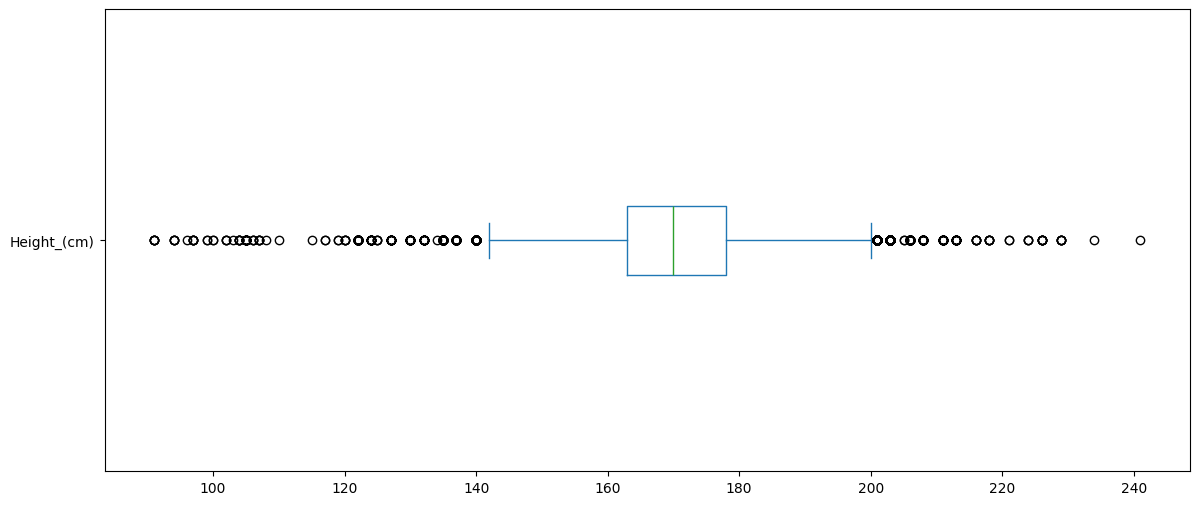

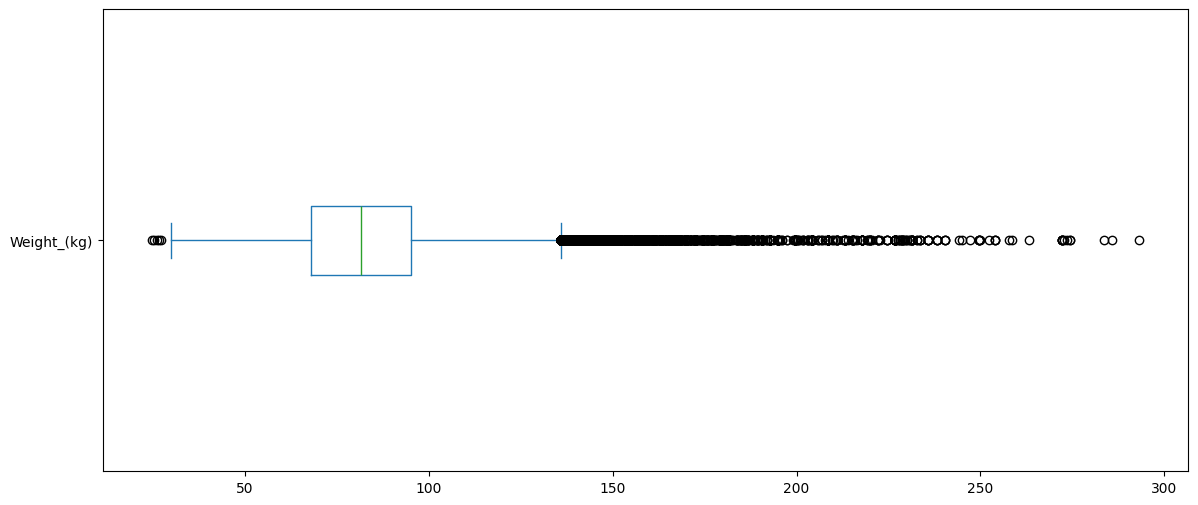

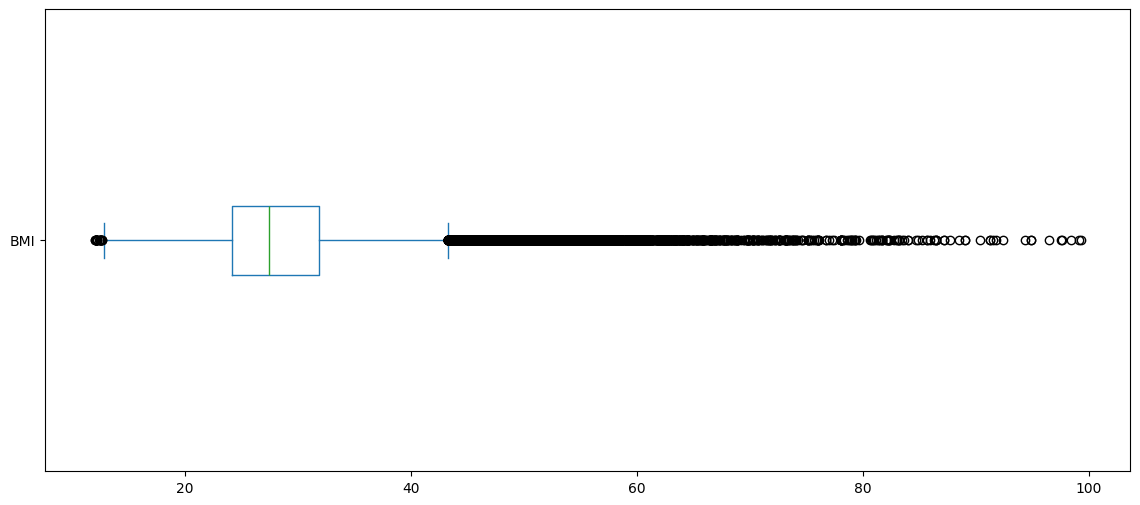

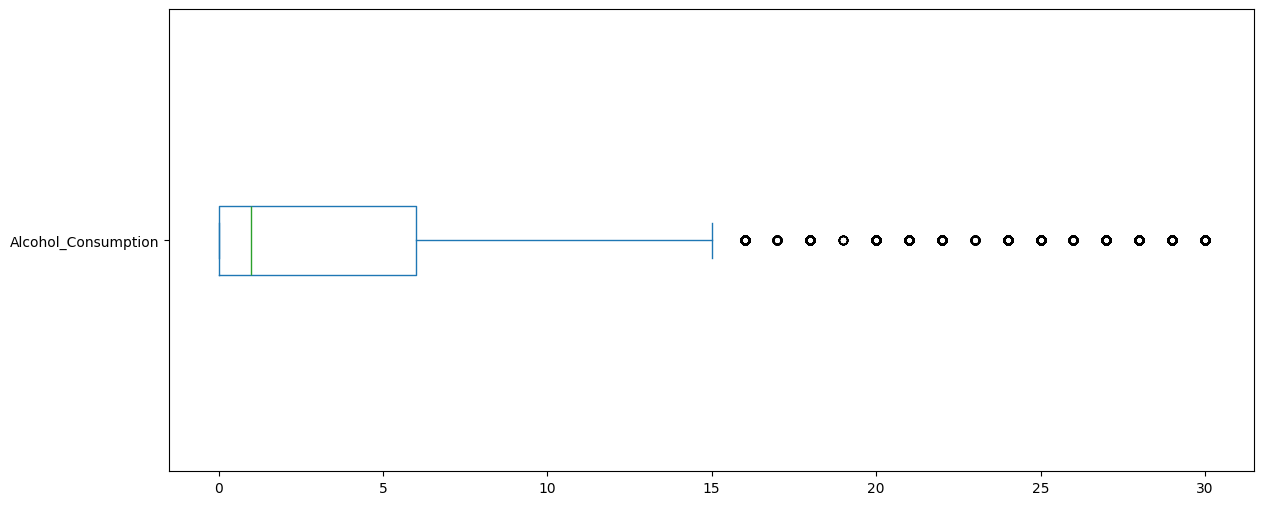

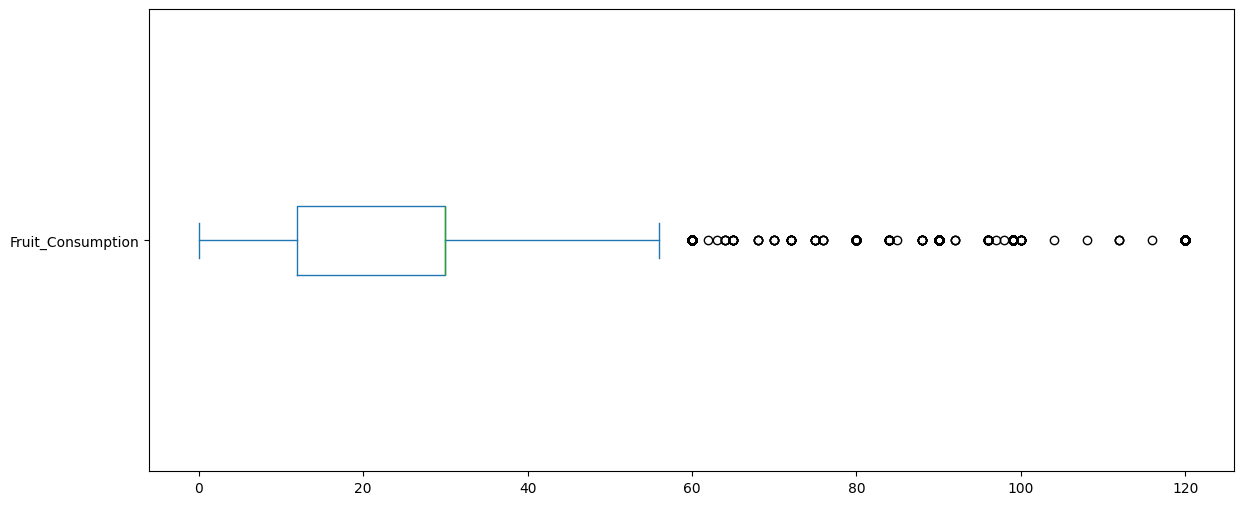

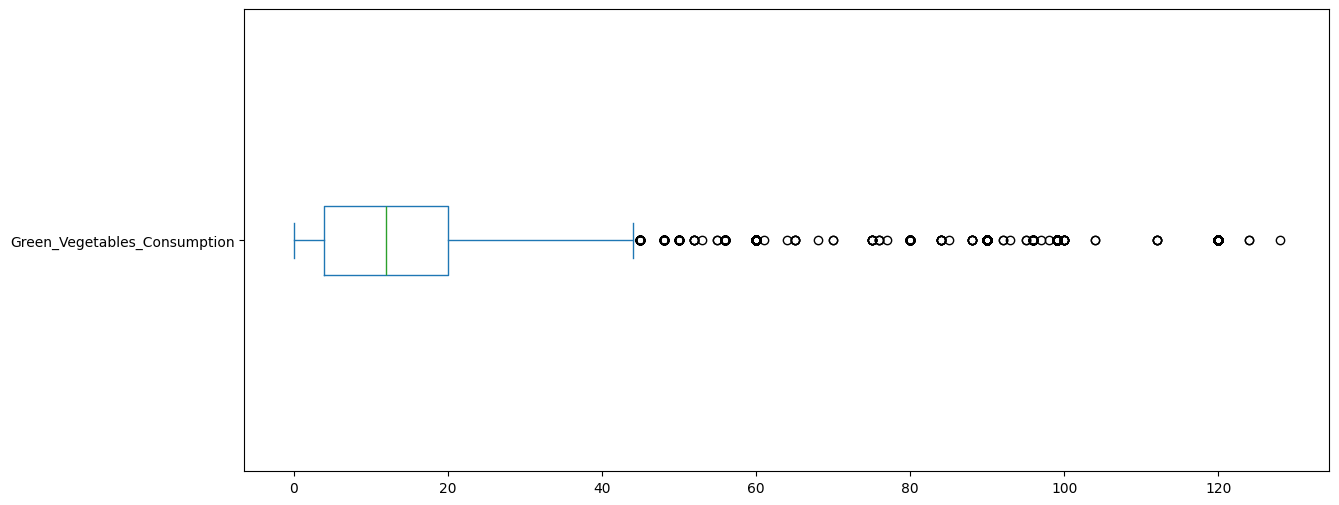

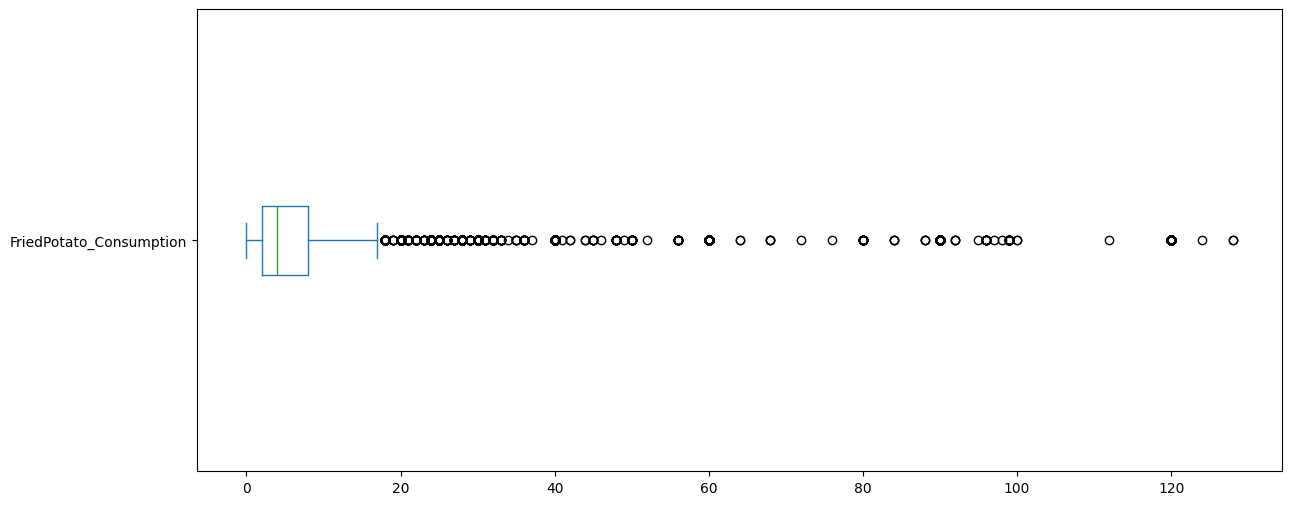

In [13]:
continuous_vars = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for var in continuous_vars:
    cvd_df[var].plot(kind = 'box', vert = False, figsize = (14, 6))
    # plt.boxplot(cvd_df[var], vert=False)
    # plt.title(f'Boxplot de {var}')
    # plt.xlabel(f'Valores de {var}')
    plt.show()

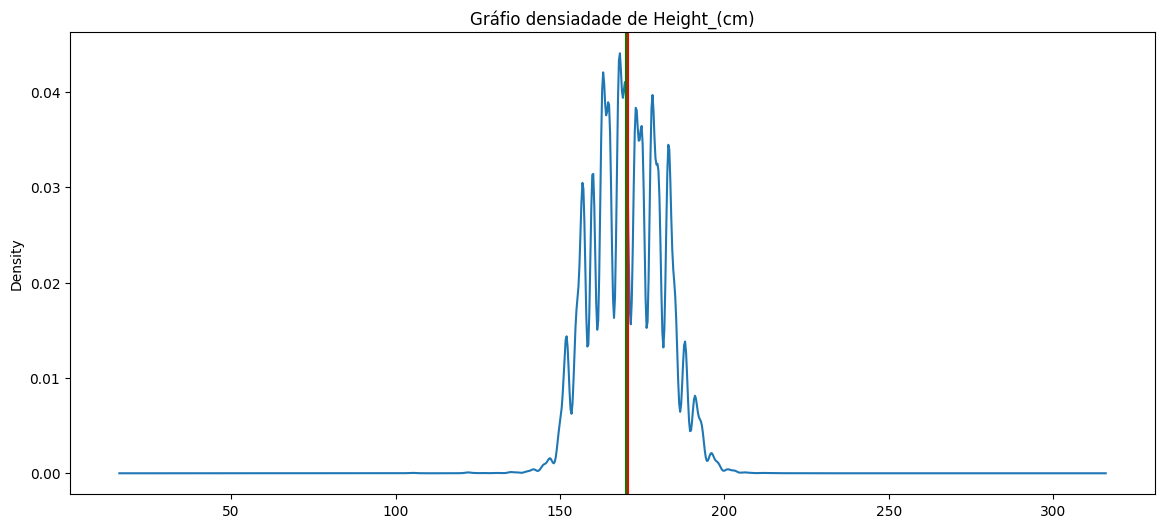

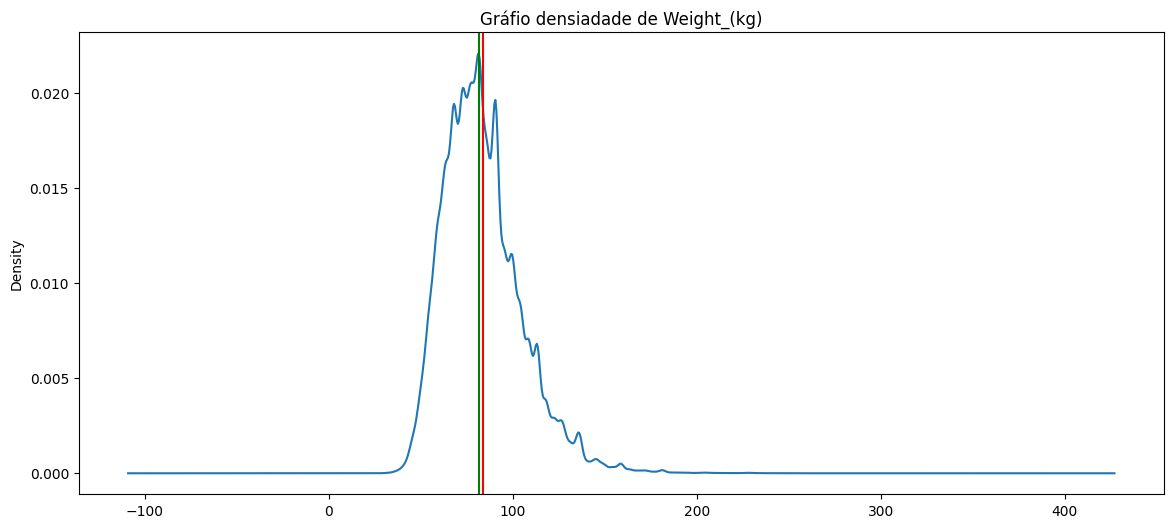

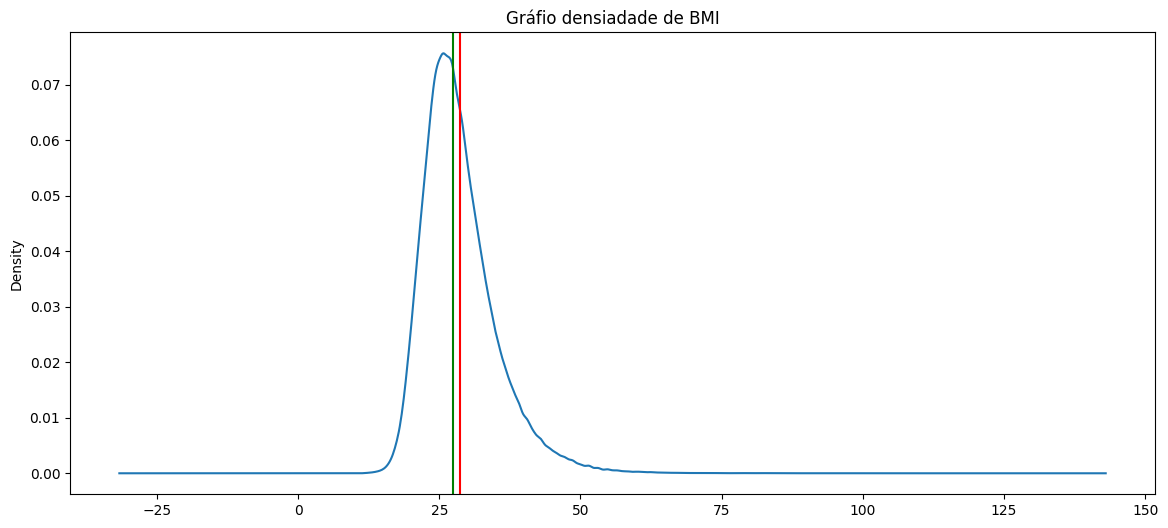

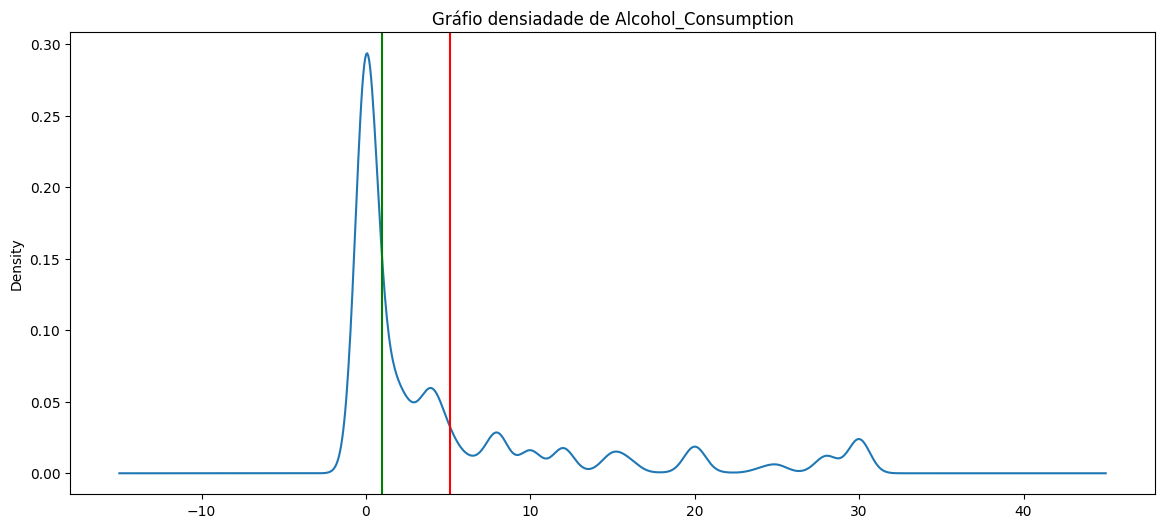

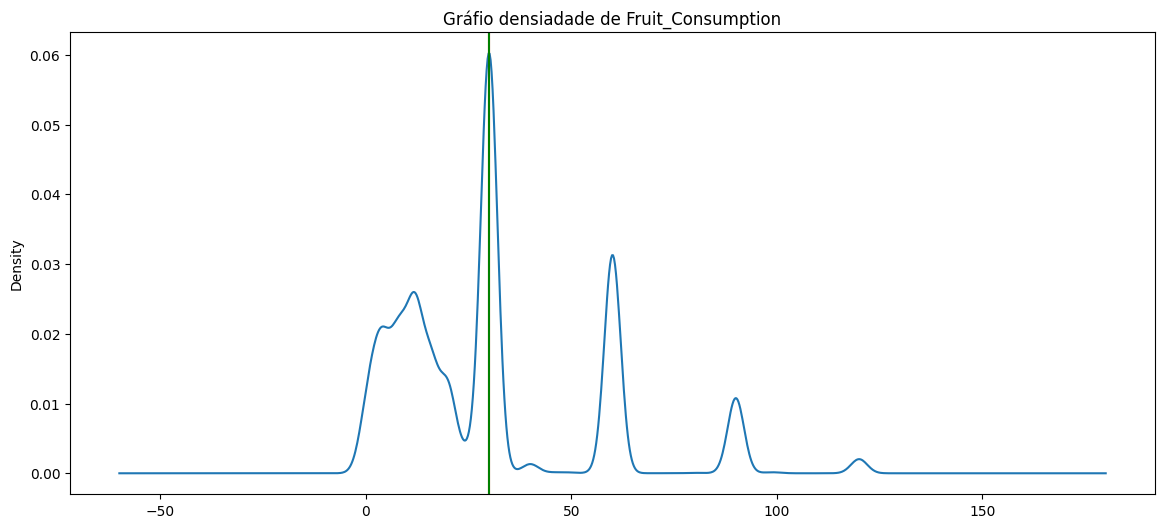

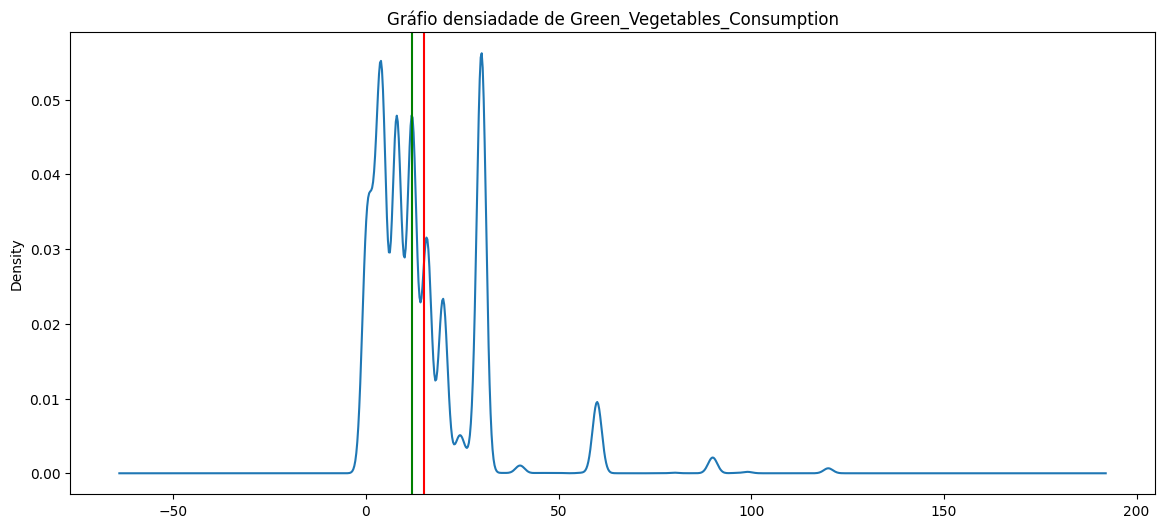

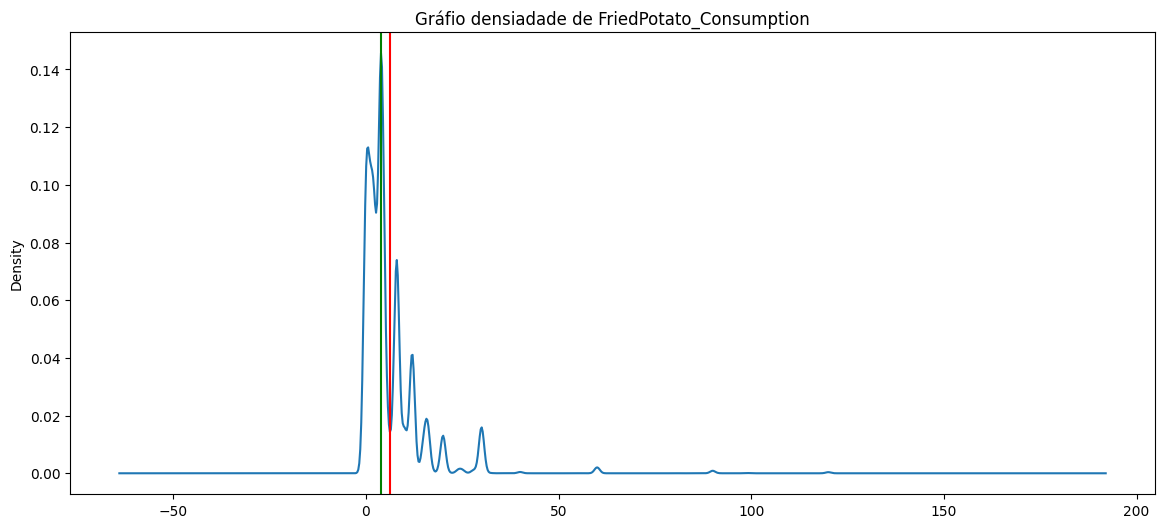

In [14]:
for var in continuous_vars:
    ax = cvd_df[var].plot(kind = 'density', figsize = (14, 6))
    ax.axvline(cvd_df[var].mean(), color = 'red')
    ax.axvline(cvd_df[var].median(), color = 'green')
    # plt.boxplot(cvd_df[var], vert=False)
    plt.title(f'Gráfio densiadade de {var}')
    # plt.xlabel(f'Valores de {var}')
    plt.show()

In [ ]:
for var in continuous_vars:
    ax = cvd_df[var].plot(kind = 'hist', figsize = (14, 6))
    ax.set_ylabel('Número de registos')
    # plt.boxplot(cvd_df[var], vert=False)
    plt.title(f'Histograma de {var}')
    # plt.xlabel(f'Valores de {var}')
    plt.show()

## Visualização e análise de dados categoricos (Discretos)

In [ ]:
discrete_vars = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

for var in discrete_vars:
    cvd_df[var].value_counts().plot(kind='bar')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
for var in discrete_vars:
    cvd_df[var].value_counts().plot(kind='pie')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

## Relação entre colunas

In [ ]:
corr = cvd_df.corr(numeric_only=True)
corr

In [ ]:
fig = plt.figure(figsize=(8, 8))
plt.matshow(corr, cmap='RdBu')
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns);


In [ ]:
cvd_df.plot(kind='scatter', x='Alcohol_Consumption', y='BMI', figsize=(6, 6))

In [ ]:
cvd_df.plot(kind='scatter', x='Weight_(kg)', y='BMI', figsize=(6,6))

In [ ]:
ax = cvd_df[['Alcohol_Consumption', 'Heart_Disease']].boxplot(by='Heart_Disease', figsize=(10, 6))
ax.set_ylabel('Alcohol_Consumption')

In [ ]:
ax = cvd_df[['BMI', 'Heart_Disease']].boxplot(by='Heart_Disease', figsize=(10, 6))
ax.set_ylabel('BMI')

# Outliers

In [ ]:
# Valores únicos da variável
print(cvd_df['Diabetes'].unique())


Na coluna outliers encontramos alguns outliers como tinha referido anteriormente. Para tratar este outliers decidimos substituir todos estes valores por nao. 

In [21]:

#cvd_df['Diabetes'] = cvd_df['Diabetes'].replace({
    #'No, pre-diabetes or borderline diabetes': 'No',
    #'Yes, but female told only during pregnancy': 'No'
#})

In [ ]:
# Valores únicos da variável
print(cvd_df['Diabetes'].unique())

In [ ]:
cvd_df['Diabetes'].value_counts().plot(kind='bar')
plt.title(f'Distribuição de {'Diabetes'}')
plt.xlabel(var)
plt.ylabel('Frequency')
plt.show()